In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [12]:
def mha_flops_formula(n, h = 12, d=768):
    # 8 * L * d^2 + 4 * L^2 * d - 4 * L * d + h * L^2
    result = (8 * n * math.pow(d, 2)) + (4 * math.pow(n, 2) * d) - (4 * n * d ) + (h * math.pow(n, 2))
    return result

def ffnn_flops_formula(n, d=768):
    # 16 * L * d^2 - L * d
    result = ( 16 * n * math.pow(d, 2) ) - (n * d)
    return result

In [6]:
exp = [i+1 for i in range(9)]

In [7]:
seq_lens = [math.pow(2, e) for e in exp]
#seq_lens = [i for i in range(2, 512, 2)]

In [13]:
hidden_dim = 768
l = 1
h = 12

In [9]:
mha_flops, ffn_flops = [], []

In [14]:
for seq in seq_lens:
    mha_flops_count = mha_flops_formula(n=int(seq), d=hidden_dim, h=h)
    mha_flops.append(mha_flops_count)
    ffn_flops_count = ffnn_flops_formula(n=int(seq), d=hidden_dim)
    ffn_flops.append(ffn_flops_count)

In [15]:
mha = pd.DataFrame({"FLOPs": mha_flops, "Sequence Length": seq_lens, "Layer": ["MHA" for _ in range(len(seq_lens))]})
ffn = pd.DataFrame({"FLOPs": ffn_flops, "Sequence Length": seq_lens, "Layer": ["FFNN" for _ in range(len(seq_lens))]})

In [16]:
data = pd.concat([mha, ffn], axis=0)

In [17]:
data

,FLOPs,Sequence Length,Layer
0,9.443376e+06,2.0,MHA
1,1.891142e+07,4.0,MHA
2,3.792154e+07,8.0,MHA
3,7.623782e+07,16.0,MHA
4,1.540547e+08,32.0,MHA
5,3.144253e+08,64.0,MHA
6,6.541148e+08,128.0,MHA
7,1.409286e+09,256.0,MHA
8,3.222798e+09,512.0,MHA
0,1.887283e+07,2.0,FFNN


In [18]:
X = "Sequence Length"
Y = "FLOPs"

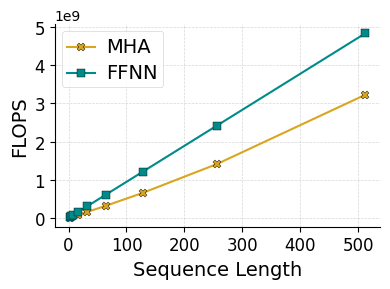

In [19]:
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize=(4, 3))
ax = sns.lineplot(data=data,
                  x=X, 
                  y=Y, 
                  hue="Layer", 
                  markers={"MHA": "X", "FFNN": "s"}, 
                  dashes=False, 
                  style="Layer",
                  palette = {"MHA": "goldenrod", "FFNN": "darkcyan"},
                  markeredgecolor="black",
                  markeredgewidth=0.3)
plt.grid(linestyle='--', linewidth='0.5', alpha=0.5)
legend = ax.legend()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
legend.get_frame().set_linewidth(0.5)
for text in legend.get_texts():
    text.set_color('black')
    text.set_fontsize(14)
for line in ax.lines:
    line.set_markersize(6) 
ax.set_xlabel('Sequence Length', fontsize=14)
ax.set_ylabel('FLOPS', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
#plt.savefig("./mha_ffn_flos_comparison.pdf")